In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Flatten

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

import pathlib
import PIL

In [ ]:
model = Xception(weights='imagenet', include_top=False)

In [ ]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = pathlib.Path("/content/drive/MyDrive/Trabalho TEIA/Treino")
image_count = len(list(train_dir.glob('*/*.jpg')))
print("Quantidade de imagens de treino: ", image_count)

Quantidade de imagens de treino:  7571


In [ ]:
img_height = 178
img_width = 218
batch_size = 32

In [ ]:
dataset_treino = keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 11332 files belonging to 2 classes.
Using 9066 files for training.


In [ ]:
dataset_validacao = keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 11332 files belonging to 2 classes.
Using 2266 files for validation.


In [ ]:
class_names = dataset_treino.class_names
print(class_names)
num_classes = len(class_names)

['Calvo', 'Não Calvo']


In [ ]:
input_tensor = Input(shape=(178,218,3))
pre_trained_model = Xception(include_top=False, weights='imagenet', input_tensor=input_tensor, input_shape=(299,299,3))

In [ ]:
for i, layer in enumerate(pre_trained_model.layers):
   print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_4
13 block2_pool
14 batch_normalization_4
15 add_12
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_5
23 block3_pool
24 batch_normalization_5
25 add_13
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_6
33 block4_pool
34 batch_normalization_6
35 add_14
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_15
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_se

In [ ]:
for layer in pre_trained_model.layers[:]:
  layer.trainable = False

In [ ]:
x = pre_trained_model.output
x = Flatten()(x)
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
model3 = Model(inputs=pre_trained_model.input, outputs=predictions)

In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 178, 218, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 88, 108, 32)          864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 88, 108, 32)          128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 88, 108, 32)          0         ['block1_conv1_bn[0][0]'] 

In [ ]:
epochs = 10

history = model3.fit(
    dataset_treino,
    validation_data = dataset_validacao,
    epochs = epochs
)

Epoch 1/10
284/284 [==============================] - 51s 142ms/step - loss: 10.0672 - accuracy: 0.8097 - val_loss: 12.6835 - val_accuracy: 0.7551
Epoch 2/10
284/284 [==============================] - 40s 140ms/step - loss: 6.1541 - accuracy: 0.8756 - val_loss: 10.9118 - val_accuracy: 0.7816
Epoch 3/10
284/284 [==============================] - 39s 136ms/step - loss: 5.4217 - accuracy: 0.8882 - val_loss: 4.9730 - val_accuracy: 0.8817
Epoch 4/10
284/284 [==============================] - 39s 137ms/step - loss: 6.3725 - accuracy: 0.8893 - val_loss: 9.5434 - val_accuracy: 0.8839
Epoch 5/10
284/284 [==============================] - 39s 136ms/step - loss: 4.4275 - accuracy: 0.9130 - val_loss: 6.2741 - val_accuracy: 0.8901
Epoch 6/10
284/284 [==============================] - 41s 144ms/step - loss: 2.5781 - accuracy: 0.9322 - val_loss: 6.4979 - val_accuracy: 0.9069
Epoch 7/10
284/284 [==============================] - 42s 144ms/step - loss: 3.8889 - accuracy: 0.9230 - val_loss: 12.2959 - va

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

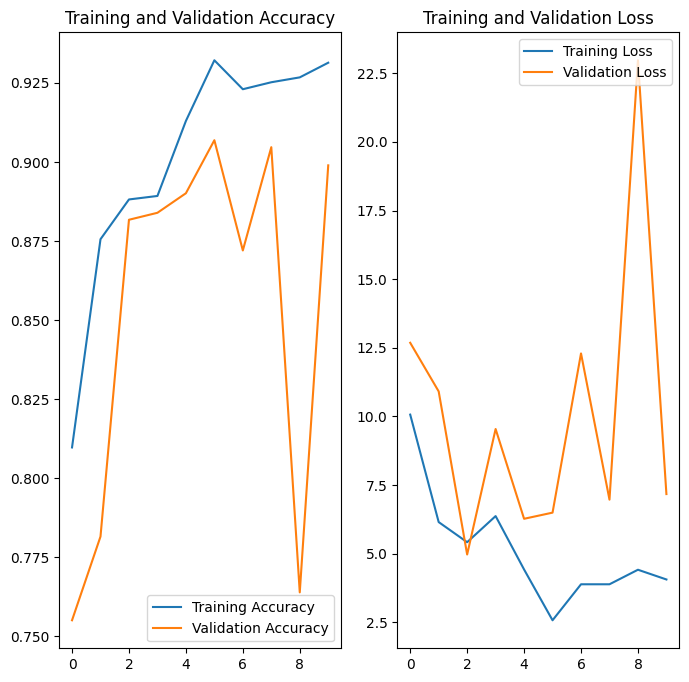

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()